# Force balance calculations for ice-cored moraine dam

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# set variables and constants
h_i = 15 # ice thickness (m)
h_d = 5 # debris thickness (m)
porosity_d = 0.8 # debris porosity
slope = 10 # surface slope (degrees)
n = 3 # Glen's flow law exponent
A = 2*10**-16 # rheology constant (Pa^-3/yr)
g = 9.81 # acceleration due to gravity (m/s^2)
rho_i = 917 # density of ice (kg/m^3)
rho_d = 2650 # density of debris cover (kg/m^3)

In [71]:
# calculate basal driving stress
tau_b = (rho_i*g*h_i + rho_d*g*h_d*porosity_d) * np.sin(np.radians(slope))

In [74]:
# calculate surface velocity (m/yr)
u_surf = (A/2)*h_i*tau_b**n
print(u_surf) # seems to be reasonable

0.4746463612053375


In [97]:
def surface_velocity(h_i = 15, # ice thickness (m)
                     h_d = 5, # debris thickness (m)
                     porosity_d = 0.8, # debris porosity
                     slope = 10, # surface slope (degrees)
                     n = 3, # Glen's flow law exponent
                     A = 2*10**-16, # rheology constant (Pa^-3/yr)
                     g = 9.81, # acceleration due to gravity (m/s^2)
                     rho_i = 917, # density of ice (kg/m^3)
                     rho_d = 2650): # density of debris cover (kg/m^3)
    tau_b = (rho_i*g*h_i + rho_d*g*h_d*porosity_d) * np.sin(np.radians(slope))
    u_surf = (2A/(n+1))*h_i*tau_b**n
    return u_surf

In [98]:
# test a range of ice thicknesses:
h_i = np.linspace(0, 100)
u_surf = surface_velocity(h_i=h_i)

Text(0.5, 0, 'ice thickness (m)')

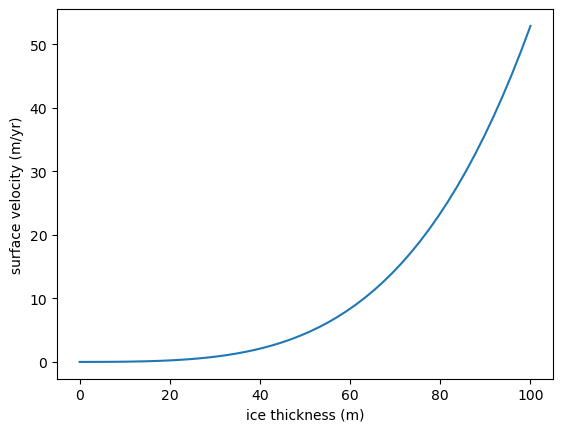

In [99]:
f, ax = plt.subplots()
ax.plot(h_i, u_surf)
ax.set_ylabel('surface velocity (m/yr)')
ax.set_xlabel('ice thickness (m)')

In [100]:
# test a range of debris thicknesses:
h_d = np.linspace(0, 50)
u_surf = surface_velocity(h_d=h_d)

Text(0.5, 0, 'debris thickness (m)')

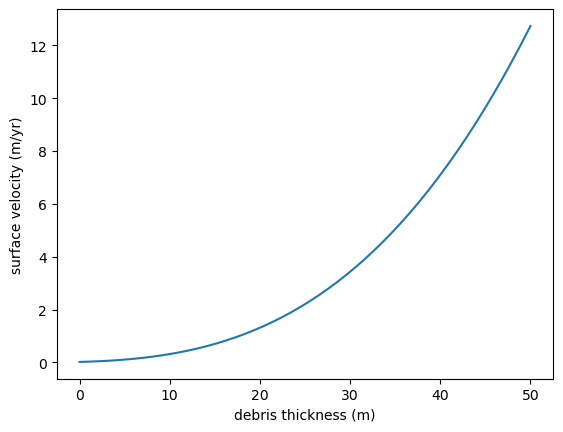

In [101]:
f, ax = plt.subplots()
ax.plot(h_d, u_surf)
ax.set_ylabel('surface velocity (m/yr)')
ax.set_xlabel('debris thickness (m)')

In [116]:
# alternatively, for a given height, test a range of ice to debris ratios
h = 20
i_d_ratio = np.linspace(0, 1)
h_i = h*i_d_ratio
h_d = h - h_i
u_surf = surface_velocity(h_d=h_d, h_i=h_i)

Text(0.5, 0, 'ice thickness to debris thickness ratio')

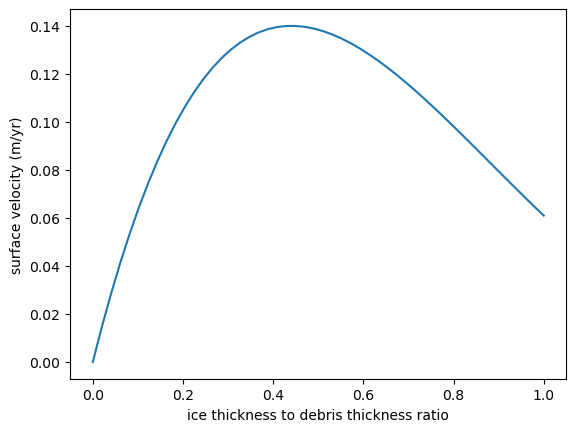

In [117]:
f, ax = plt.subplots()
ax.plot(i_d_ratio, u_surf)
ax.set_ylabel('surface velocity (m/yr)')
ax.set_xlabel('ice thickness to debris thickness ratio')

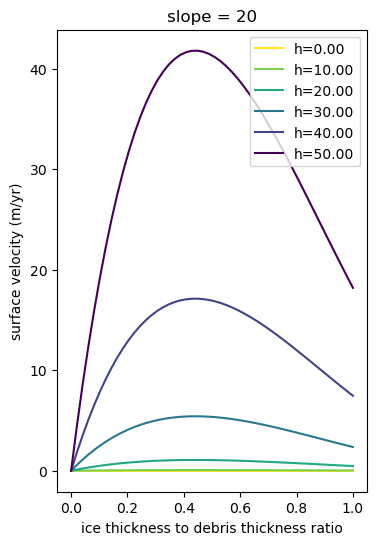

In [164]:
# set parameters:
slope = 20

# for multiple thicknesses: 
h_range = np.linspace(0, 50, 6)
i_d_ratio = np.linspace(0, 1)

f, ax = plt.subplots(figsize=(4, 6))
for h in h_range:
    h_i = h*i_d_ratio
    h_d = h - h_i
    u_surf = surface_velocity(h_d=h_d, h_i=h_i, slope=slope)
    color = plt.cm.viridis_r(h/h_range.max())
    ax.plot(i_d_ratio, u_surf, c=color, label=f'h={h:.2f}')

ax.legend()
ax.set_ylabel('surface velocity (m/yr)')
ax.set_xlabel('ice thickness to debris thickness ratio')
ax.set_title(f'slope = {slope}')
f.savefig(f'figs/veloc_slope{slope}.png', dpi=300)

In [102]:
# test a range of surface slopes:
# test a range of debris thicknesses:
slope = np.linspace(0, 50)
u_surf = surface_velocity(slope=slope)

Text(0.5, 0, 'slope (degrees)')

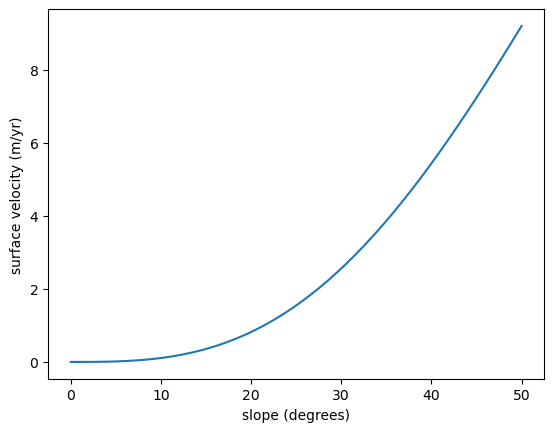

In [103]:
f, ax = plt.subplots()
ax.plot(slope, u_surf)
ax.set_ylabel('surface velocity (m/yr)')
ax.set_xlabel('slope (degrees)')